# Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set(style = 'whitegrid')

In [2]:
pip install openpyxl

     |████████████████████████████████| 242 kB 291 kB/s            
Note: you may need to restart the kernel to use updated packages.


In [3]:
#Reading Data
df =pd.read_excel("../input/flight-fare-prediction-mh/Data_Train.xlsx")
Test=pd.read_excel("../input/flight-fare-prediction-mh/Test_set.xlsx")
df

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
0,IndiGo,24/03/2019,Banglore,New Delhi,BLR → DEL,22:20,01:10 22 Mar,2h 50m,non-stop,No info,3897
1,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,7662
2,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882
3,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,6218
4,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,13302
...,...,...,...,...,...,...,...,...,...,...,...
10678,Air Asia,9/04/2019,Kolkata,Banglore,CCU → BLR,19:55,22:25,2h 30m,non-stop,No info,4107
10679,Air India,27/04/2019,Kolkata,Banglore,CCU → BLR,20:45,23:20,2h 35m,non-stop,No info,4145
10680,Jet Airways,27/04/2019,Banglore,Delhi,BLR → DEL,08:20,11:20,3h,non-stop,No info,7229
10681,Vistara,01/03/2019,Banglore,New Delhi,BLR → DEL,11:30,14:10,2h 40m,non-stop,No info,12648


In [4]:
#Dataframe summary
pd.DataFrame({'unicos':df.nunique(),
              'missing': df.isna().sum(),
              'tipo':df.dtypes})

,unicos,missing,tipo
Airline,12,0,object
Date_of_Journey,44,0,object
Source,5,0,object
Destination,6,0,object
Route,128,1,object
Dep_Time,222,0,object
Arrival_Time,1343,0,object
Duration,368,0,object
Total_Stops,5,1,object
Additional_Info,10,0,object


In [5]:
df[df.isna().values]

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price
9039,Air India,6/05/2019,Delhi,Cochin,NaN,09:45,09:25 07 May,23h 40m,NaN,No info,7480
9039,Air India,6/05/2019,Delhi,Cochin,NaN,09:45,09:25 07 May,23h 40m,NaN,No info,7480


In [6]:
#so you should drop row of the nullvalues
df.drop([9039],axis=0,inplace=True)

In [7]:
df.reset_index(inplace=True)
df.drop(['index'],axis=1,inplace=True)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10682 entries, 0 to 10681
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype 
---  ------           --------------  ----- 
 0   Airline          10682 non-null  object
 1   Date_of_Journey  10682 non-null  object
 2   Source           10682 non-null  object
 3   Destination      10682 non-null  object
 4   Route            10682 non-null  object
 5   Dep_Time         10682 non-null  object
 6   Arrival_Time     10682 non-null  object
 7   Duration         10682 non-null  object
 8   Total_Stops      10682 non-null  object
 9   Additional_Info  10682 non-null  object
 10  Price            10682 non-null  int64 
dtypes: int64(1), object(10)
memory usage: 918.1+ KB


In [9]:
df.describe()

,Price
count,10682.000000
mean,9087.214567
std,4611.548810
min,1759.000000
25%,5277.000000
50%,8372.000000
75%,12373.000000
max,79512.000000


# Handling numerical data


In [10]:
#Date_of_Journey
#extract day and month from date of journy
df["Day_of_Journey"]=pd.to_datetime(df["Date_of_Journey"],format="%d/%m/%Y").dt.day
df["month_of_Journey"]=pd.to_datetime(df["Date_of_Journey"],format="%d/%m/%Y").dt.month


In [11]:
df["Day_of_Journey"].unique()

array([24,  1,  9, 12, 27, 18,  3, 15,  6, 21])

In [12]:
df["month_of_Journey"].unique()

array([3, 5, 6, 4])

In [13]:
#Dep_Time
set([len(i.split()) for i in df["Dep_Time"].tolist()])

{1}

so there is one form as H:M 

In [14]:
#From Dept_time  extract hour and minutes 
df["Hour_Dep_Time"]=df["Dep_Time"].apply(lambda x:x.split(":")[0]).astype(int)
df["minute_Dep_Time"]=df["Dep_Time"].apply(lambda x:x.split(":")[1]).astype(int)

In [15]:
#Arrival_Time

set([len(i.split()) for i in df["Arrival_Time"].tolist()])


{1, 3}

so there are two forma as H:M or H:M + name of day +name of month

In [16]:
pd.Series([len(i.split()) for i in df["Arrival_Time"].tolist()]).value_counts()


1    6348
3    4334
dtype: int64

there are 6348 as H:M and 4334 as H:M + name of day +name of month

In [17]:
df['AccurateArrivalTime'] = df['Arrival_Time'].apply(lambda x : x.split()[0])

In [18]:
df['AccurateArrivalDay']=df['Arrival_Time'].apply(lambda x:x.split()[1] if len(x.split())==3 else "None")
df['AccurateArrivalmonth']=df['Arrival_Time'].apply(lambda x:str(x).split()[2] if len(str(x).split())==3 else "None")
df['ArrivalHour'] = df['AccurateArrivalTime'].apply(lambda x : x.split(':')[0])

In [19]:
df['AccurateArrivalDay'].unique()

array(['22', 'None', '10', '13', '02', '04', '28', '19', '07', '16', '25',
       '20', '23', '11', '03', '08', '05', '26', '29', '17'], dtype=object)

In [20]:
df['AccurateArrivalmonth'].unique()

array(['Mar', 'None', 'Jun', 'May', 'Apr'], dtype=object)

In [21]:
#To find an error in the data
def FindWrongData(DepDay,ArrivalDay):
    if ArrivalDay !="None":
        if int(ArrivalDay)<int(DepDay):
            return True
        else :
            return False
    else: 
        return False
df['DayDifference']=df.apply(lambda x:FindWrongData(x.Day_of_Journey,x.AccurateArrivalDay),axis=1)

In [22]:
#errors in the data as true in column of DayDifference
df[['Day_of_Journey','AccurateArrivalDay','DayDifference']]

,Day_of_Journey,AccurateArrivalDay,DayDifference
0,24,22,True
1,1,None,False
2,9,10,False
3,12,None,False
4,1,None,False
...,...,...,...
10677,9,None,False
10678,27,None,False
10679,27,None,False
10680,1,None,False


In [23]:
df[['Day_of_Journey','AccurateArrivalDay','DayDifference']]["DayDifference"].value_counts()

False    10593
True        89
Name: DayDifference, dtype: int64

Found about 89 errors

In [24]:
#rongIndices
wrongIndices=df[df["DayDifference"]==True].index

In [25]:
df.loc[wrongIndices,['Day_of_Journey','AccurateArrivalDay']]

,Day_of_Journey,AccurateArrivalDay
0,24,22
21,21,19
110,18,16
379,18,16
605,21,19
...,...,...
10440,18,16
10488,15,13
10589,24,22
10637,21,19


In [26]:
df.loc[wrongIndices,['month_of_Journey','AccurateArrivalmonth']]

,month_of_Journey,AccurateArrivalmonth
0,3,Mar
21,3,Mar
110,3,Mar
379,3,Mar
605,3,Mar
...,...,...
10440,3,Mar
10488,3,Mar
10589,3,Mar
10637,3,Mar


In [27]:
df.loc[wrongIndices,['month_of_Journey','AccurateArrivalmonth']]["month_of_Journey"].value_counts()

3    88
4     1
Name: month_of_Journey, dtype: int64

In [28]:
df.loc[wrongIndices,['month_of_Journey','AccurateArrivalmonth']]["AccurateArrivalmonth"].value_counts()

Mar    88
Apr     1
Name: AccurateArrivalmonth, dtype: int64

In [29]:
#to make sure that month_of_Journey equal AccurateArrivalmonth

MonthsDict  = {3:'Mar',4:'Apr'}
for a,b in zip(df.loc[wrongIndices,['month_of_Journey','AccurateArrivalmonth']]['month_of_Journey'].tolist(),
               df.loc[wrongIndices,["month_of_Journey",'AccurateArrivalmonth']]['AccurateArrivalmonth'].tolist()) : 
    if MonthsDict[a] != b : 
        print(a)

In [30]:
#drop rows when ArrivalDay < DepDay
df.drop(df[df['DayDifference']==True].index,axis=0,inplace=True)

In [31]:
df.reset_index(inplace=True)
df.drop("index",axis=1,inplace=True)

In [32]:
PartOfData=df[df["AccurateArrivalDay"]!="None"]
PartOfData

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,Price,Day_of_Journey,month_of_Journey,Hour_Dep_Time,minute_Dep_Time,AccurateArrivalTime,AccurateArrivalDay,AccurateArrivalmonth,ArrivalHour,DayDifference
1,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,13882,9,6,9,25,04:25,10,Jun,04,False
5,Jet Airways,12/03/2019,Banglore,New Delhi,BLR → BOM → DEL,18:55,10:25 13 Mar,15h 30m,1 stop,In-flight meal not included,11087,12,3,18,55,10:25,13,Mar,10,False
6,Jet Airways,01/03/2019,Banglore,New Delhi,BLR → BOM → DEL,08:00,05:05 02 Mar,21h 5m,1 stop,No info,22270,1,3,8,0,05:05,02,Mar,05,False
7,Jet Airways,12/03/2019,Banglore,New Delhi,BLR → BOM → DEL,08:55,10:25 13 Mar,25h 30m,1 stop,In-flight meal not included,11087,12,3,8,55,10:25,13,Mar,10,False
12,Jet Airways,9/05/2019,Kolkata,Banglore,CCU → BOM → BLR,21:10,09:20 10 May,12h 10m,1 stop,In-flight meal not included,9663,9,5,21,10,09:20,10,May,09,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10576,Jet Airways,12/06/2019,Delhi,Cochin,DEL → BOM → COK,18:15,19:00 13 Jun,24h 45m,1 stop,In-flight meal not included,10262,12,6,18,15,19:00,13,Jun,19,False
10577,Jet Airways,12/03/2019,Banglore,New Delhi,BLR → BOM → DEL,22:55,20:20 13 Mar,21h 25m,1 stop,In-flight meal not included,11087,12,3,22,55,20:20,13,Mar,20,False
10582,Jet Airways,27/06/2019,Delhi,Cochin,DEL → AMD → BOM → COK,23:05,19:00 28 Jun,19h 55m,2 stops,In-flight meal not included,11150,27,6,23,5,19:00,28,Jun,19,False
10583,Jet Airways,27/05/2019,Delhi,Cochin,DEL → AMD → BOM → COK,13:25,04:25 28 May,15h,2 stops,No info,16704,27,5,13,25,04:25,28,May,04,False


In [33]:
Differences = []
for a,b in zip(PartOfData['Day_of_Journey'].tolist(),PartOfData['AccurateArrivalDay'].tolist()) : 
    Differences.append(int(b) - int(a))
set(Differences)

{1, 2, 4}

It is clear that the travel time ranges from 1 or 2 or 4 days

In [34]:
#Duration
set(len(i.split()) for i in df["Duration"].tolist())

{1, 2}

In [35]:
pd.Series(len(i.split()) for i in df["Duration"].tolist()).value_counts()

2    9572
1    1021
dtype: int64

there are two forms

In [36]:
BothHM,HAlone,MAlone,NoHM =0,0,0,0
for i in df['Duration'].tolist() : 
    if 'h' in i and 'm' in i : 
        BothHM+= 1 
    elif 'h' in i and not 'm' in i : 
        HAlone+=1
    elif not 'h' in i and  'm' in i : 
        MAlone+=1
    else : 
        NoHM  +=1
        
BothHM,HAlone,MAlone,NoHM  

(9572, 1020, 1, 0)

In [37]:
#for index of MAlone
for n,i in enumerate(df['Duration'].tolist()) : 
    if not 'h' in i and  'm' in i  : 
        print(n)

6419


In [38]:
df.loc[6419]["Duration"]

'5m'

In [39]:
df.drop([6419],axis = 0 , inplace=True)
df.reset_index(inplace=True)
df.drop(['index'],axis=1,inplace=True)

In [40]:
#7h 25m
#for Duration form as H:M or H
def DurationTime(n) : 
    if 'm' in n : 
        H = n.split()[0]
        H = H.strip('h')
        
        M = n.split()[1]
        M = M.strip('m')
        return (int(H)*60) + int(M)
    else : 
        H = n.strip('h')
        return int(H)*60
        
df['DurationInMinutes']     = df['Duration'].apply(lambda x : DurationTime(x))


In [41]:
df[['Duration','DurationInMinutes']]

,Duration,DurationInMinutes
0,7h 25m,445
1,19h,1140
2,5h 25m,325
3,4h 45m,285
4,2h 25m,145
...,...,...
10587,2h 30m,150
10588,2h 35m,155
10589,3h,180
10590,2h 40m,160


In [42]:
df['StopsCount'] = df['Route'].apply(lambda x : str(x).count('→') -1)

df[['Total_Stops','StopsCount']]

,Total_Stops,StopsCount
0,2 stops,2
1,2 stops,2
2,1 stop,1
3,1 stop,1
4,non-stop,0
...,...,...
10587,non-stop,0
10588,non-stop,0
10589,non-stop,0
10590,non-stop,0


In [43]:
df['Total_Stops'].value_counts()

1 stop      5555
non-stop    3483
2 stops     1508
3 stops       45
4 stops        1
Name: Total_Stops, dtype: int64

In [44]:
df['StopsCount'].value_counts()

1    5555
0    3483
2    1508
3      45
4       1
Name: StopsCount, dtype: int64

In [45]:
dec={"1 stop":1,"non-stop":0,"2 stops":2,"3 stops":3,"4 stops":4}
for x,i in zip(df["Total_Stops"].tolist(),df['StopsCount'].tolist()):
    
    if dec[x]!=i:
        
        print(i)

so df["Total_Stops"] the same df["rout"]

In [46]:
#Additional_Info
df['Additional_Info'].unique()

array(['No info', 'In-flight meal not included',
       'No check-in baggage included', '1 Short layover', 'No Info',
       '1 Long layover', 'Change airports', 'Business class',
       'Red-eye flight', '2 Long layover'], dtype=object)

In [47]:
df['Additional_Info'].value_counts()

No info                         8292
In-flight meal not included     1944
No check-in baggage included     320
1 Long layover                    19
Change airports                    7
Business class                     4
No Info                            3
1 Short layover                    1
Red-eye flight                     1
2 Long layover                     1
Name: Additional_Info, dtype: int64

In [48]:
df['MealIncluded'] = df['Additional_Info'].apply(lambda x : 1 if x != 'In-flight meal not included' else 0)
df['MealIncluded'].value_counts()

1    8648
0    1944
Name: MealIncluded, dtype: int64

In [49]:
df['Additional_Info'].replace('No Info','No info',inplace = True)

In [50]:
def DayPart(n) : 
    H = int(n.split(':')[0])
    if H < 6 : 
        return 'Early Morning'
    elif 6<=H < 12 : 
        return 'Morning'
    elif  12<=H < 15 : 
        return 'Noon'
    elif  15<=H < 19 : 
        return 'Evening'
    else : 
        return 'Night'

In [51]:
    
df['DepartureDayPart']   = df['Dep_Time'].apply(lambda x : DayPart(x))
df['ArrivalDayPart']   = df['AccurateArrivalTime'].apply(lambda x : DayPart(x))
df[['Dep_Time','DepartureDayPart','AccurateArrivalTime','ArrivalDayPart']]

,Dep_Time,DepartureDayPart,AccurateArrivalTime,ArrivalDayPart
0,05:50,Early Morning,13:15,Noon
1,09:25,Morning,04:25,Early Morning
2,18:05,Evening,23:30,Night
3,16:50,Evening,21:35,Night
4,09:00,Morning,11:25,Morning
...,...,...,...,...
10587,19:55,Night,22:25,Night
10588,20:45,Night,23:20,Night
10589,08:20,Morning,11:20,Morning
10590,11:30,Morning,14:10,Noon


In [52]:
df.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price', 'Day_of_Journey', 'month_of_Journey',
       'Hour_Dep_Time', 'minute_Dep_Time', 'AccurateArrivalTime',
       'AccurateArrivalDay', 'AccurateArrivalmonth', 'ArrivalHour',
       'DayDifference', 'DurationInMinutes', 'StopsCount', 'MealIncluded',
       'DepartureDayPart', 'ArrivalDayPart'],
      dtype='object')

In [53]:
df['DurationInMinutes'].min(),df['DurationInMinutes'].max()

(75, 2860)

In [54]:
def FlightLength(H) : 
    if H < 180 : 
        return 'Short'
    elif 180<=H < 600 : 
        return 'Medium'
    else : 
        return 'Long'
    
df['FlightLength']   = df['DurationInMinutes'].apply(lambda x : FlightLength(x))
df[['DurationInMinutes','FlightLength']]

,DurationInMinutes,FlightLength
0,445,Medium
1,1140,Long
2,325,Medium
3,285,Medium
4,145,Short
...,...,...
10587,150,Short
10588,155,Short
10589,180,Medium
10590,160,Short


In [55]:
#price
df['Price'].min(),df['Price'].max()

(1759, 79512)

In [56]:
def PriceRange(p) : 
    if p < 5000 : 
        return 'Cheap'
    elif 5000<=p < 10000 : 
        return 'Medium'
    else : 
        return 'Expensive'
    
df['PriceRange']   = df['Price'].apply(lambda x : PriceRange(x))
df[['Price','PriceRange']]

,Price,PriceRange
0,7662,Medium
1,13882,Expensive
2,6218,Medium
3,13302,Expensive
4,3873,Cheap
...,...,...
10587,4107,Cheap
10588,4145,Cheap
10589,7229,Medium
10590,12648,Expensive


In [57]:
#Source
df['Source'].unique()

array(['Kolkata', 'Delhi', 'Banglore', 'Chennai', 'Mumbai'], dtype=object)

In [58]:
#Airline
df['Airline'].unique()

array(['Air India', 'Jet Airways', 'IndiGo', 'SpiceJet',
       'Multiple carriers', 'GoAir', 'Vistara', 'Air Asia',
       'Vistara Premium economy', 'Jet Airways Business',
       'Multiple carriers Premium economy', 'Trujet'], dtype=object)

# Data Visualization

In [59]:
def CPlot(feature) : 
    global df
    fig,ax = plt.subplots(figsize = (10,6))
    sns.countplot(x = feature,data=df,linewidth = 5)
    ax.set_xticklabels(ax.get_xticklabels(),rotation = 30)
    return None

def KPlot(feature) : 
    global df
    fig,ax = plt.subplots(figsize = (10,6))
    sns.kdeplot(df[feature],shade=True)
    return None
def Pie(feature,limit=20) : 
    global data
    fig,ax = plt.subplots(figsize = (10,6))
    plt.pie(df[feature].value_counts()[:limit],labels = list(df[feature].value_counts()[:limit].index),
            autopct = '%1.2f%%',labeldistance= 1.1)
    return None

In [60]:
len(df['Airline'].unique())

12

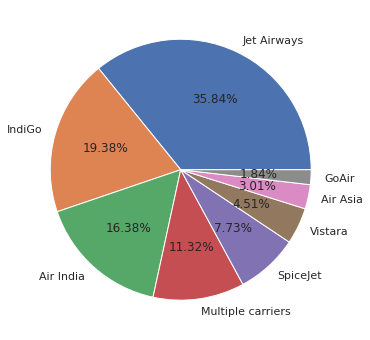

In [61]:
Pie('Airline',8)

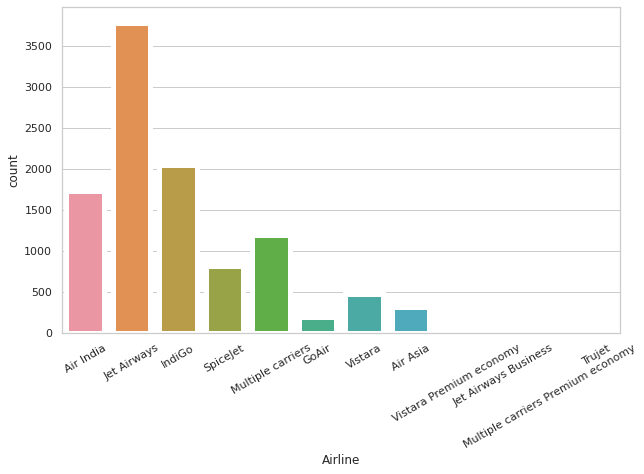

In [62]:
CPlot('Airline')

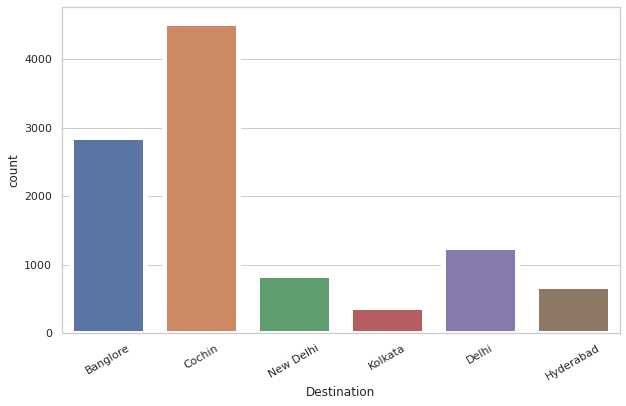

In [63]:
CPlot('Destination')

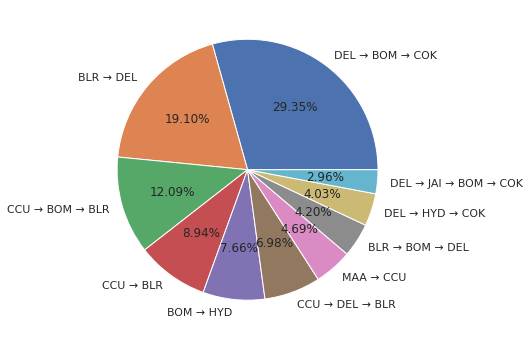

In [64]:
Pie('Route',10)

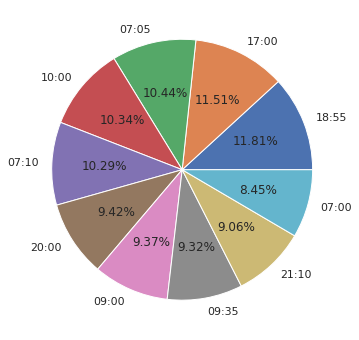

In [65]:
Pie('Dep_Time',10)

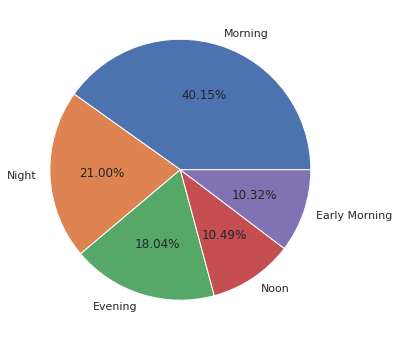

In [66]:
Pie('DepartureDayPart')

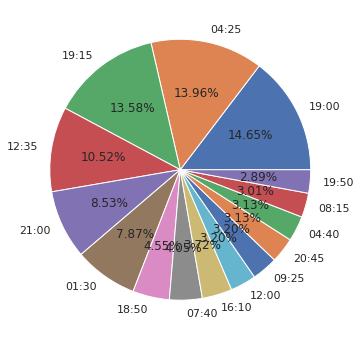

In [67]:
Pie('AccurateArrivalTime',15)

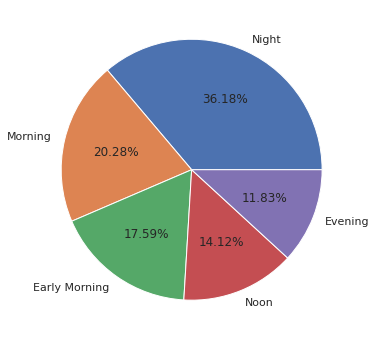

In [68]:
Pie('ArrivalDayPart')

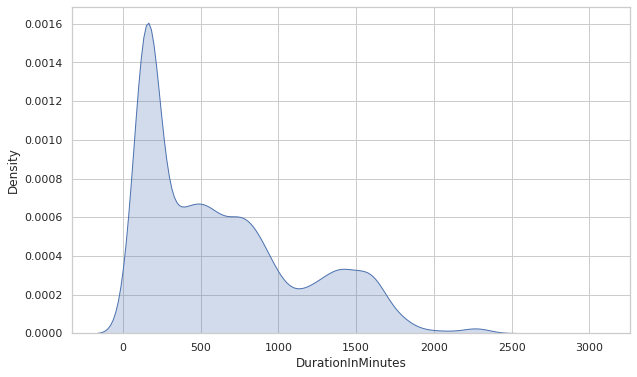

In [69]:
KPlot('DurationInMinutes')

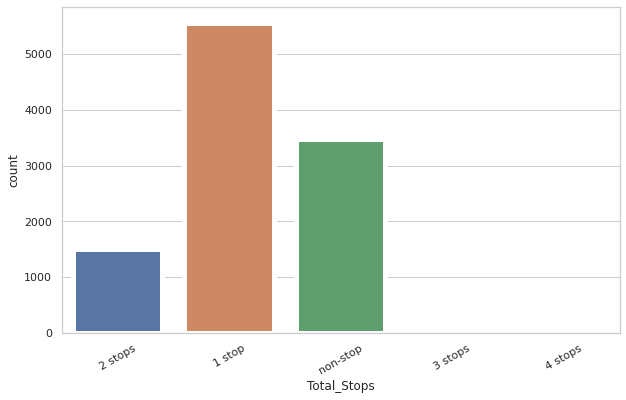

In [70]:
CPlot('Total_Stops')

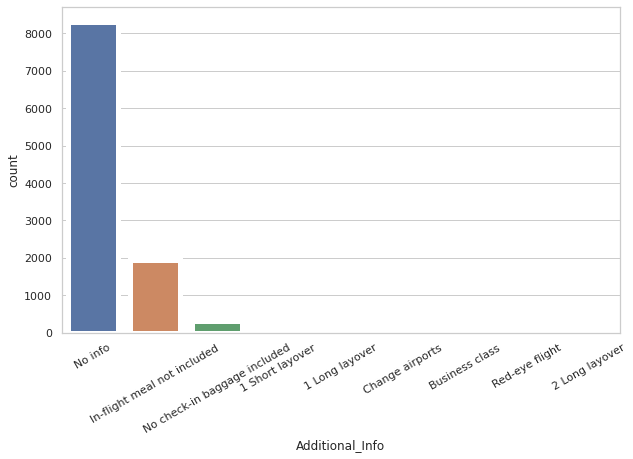

In [71]:
CPlot('Additional_Info')

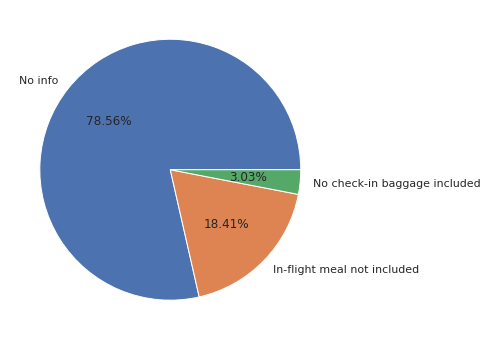

In [72]:
Pie('Additional_Info',3)

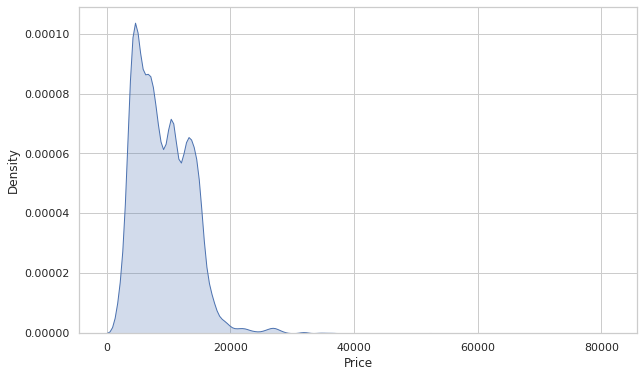

In [73]:
KPlot('Price')

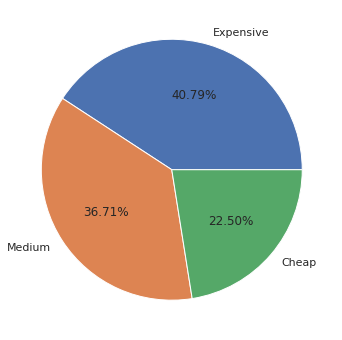

In [74]:
Pie('PriceRange')

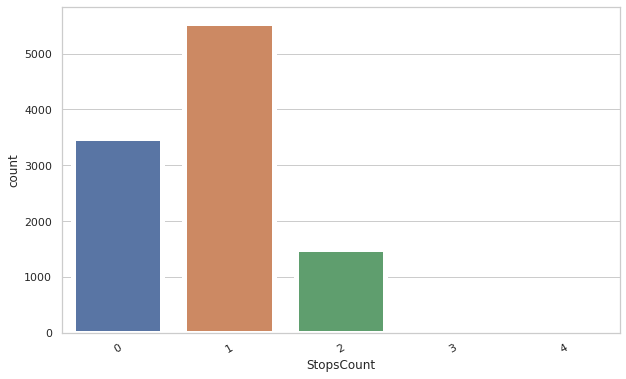

In [75]:
CPlot('StopsCount')

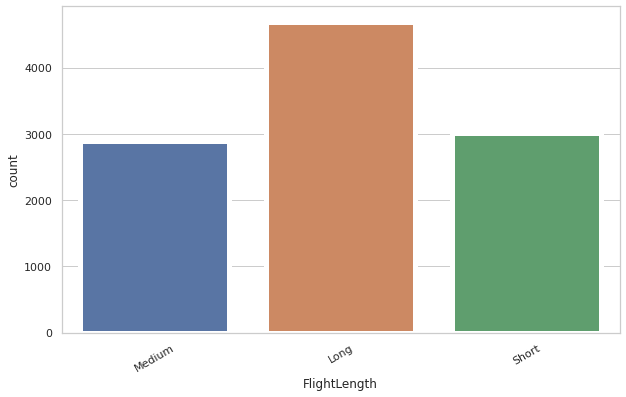

In [76]:
CPlot('FlightLength')

In [77]:
df['PriceRange'].unique()

array(['Medium', 'Expensive', 'Cheap'], dtype=object)

In [78]:
def SelectedFeaturePie(feature,limit=10) : 
    global df
    fig,ax = plt.subplots(figsize = (15,5))
    
    plt.subplot(1,3,1)
    plt.title('Cheap Tickets')
    Data = df[df['PriceRange']=='Cheap']
    plt.pie(Data[feature].value_counts()[:limit],labels = list(Data[feature].value_counts()[:limit].index),
            autopct = '%1.2f%%',labeldistance= 1.1)

    plt.subplot(1,3,2)
    plt.title('Medium Tickets')
    Data = df[df['PriceRange']=='Medium']
    plt.pie(Data[feature].value_counts()[:limit],labels = list(Data[feature].value_counts()[:limit].index),
            autopct = '%1.2f%%',labeldistance= 1.1)

    plt.subplot(1,3,3)
    plt.title('Expensive Tickets')
    Data = df[df['PriceRange']=='Expensive']
    plt.pie(Data[feature].value_counts()[:limit],labels = list(Data[feature].value_counts()[:limit].index),
            autopct = '%1.2f%%',labeldistance= 1.1)
    
    return None  

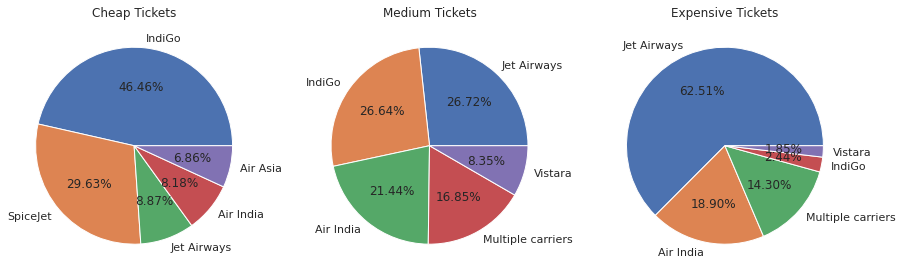

In [79]:
SelectedFeaturePie('Airline',5)

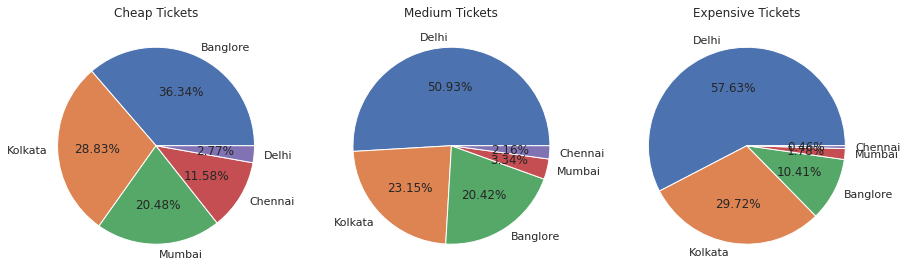

In [80]:
SelectedFeaturePie('Source',5)

# Data Preparing

In [81]:
df.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price', 'Day_of_Journey', 'month_of_Journey',
       'Hour_Dep_Time', 'minute_Dep_Time', 'AccurateArrivalTime',
       'AccurateArrivalDay', 'AccurateArrivalmonth', 'ArrivalHour',
       'DayDifference', 'DurationInMinutes', 'StopsCount', 'MealIncluded',
       'DepartureDayPart', 'ArrivalDayPart', 'FlightLength', 'PriceRange'],
      dtype='object')

In [82]:
from sklearn.preprocessing import LabelEncoder

In [83]:
AirLineEnc,SourceEnc,DestinationEnc,AdditionalInfoEnc,MealIncludedEnc,DepDayEnc,ArrivDayEnc,FlightLengthEnc = LabelEncoder(),LabelEncoder(),LabelEncoder(),LabelEncoder(),LabelEncoder(),LabelEncoder(),LabelEncoder(),LabelEncoder()

In [84]:
def ApplyEncoder(Encoder,OriginalColumn) : 
    global df
    Encoder.fit(df[OriginalColumn])
    return Encoder.transform(df[OriginalColumn])

In [85]:
df['AirLineEnc'] = ApplyEncoder(AirLineEnc,'Airline')
df['SourceEnc'] = ApplyEncoder(SourceEnc,'Source')
df['DestinationEnc'] = ApplyEncoder(DestinationEnc,'Destination')
df['AdditionalInfoEnc'] = ApplyEncoder(AdditionalInfoEnc,'Additional_Info')
df['MealIncludedEnc'] = ApplyEncoder(MealIncludedEnc,'MealIncluded')
df['DepDayEnc'] = ApplyEncoder(DepDayEnc,'DepartureDayPart')
df['ArrivDayEnc'] = ApplyEncoder(ArrivDayEnc,'ArrivalDayPart')
df['FlightLengthEnc'] = ApplyEncoder(FlightLengthEnc,'FlightLength')
df.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,...,FlightLength,PriceRange,AirLineEnc,SourceEnc,DestinationEnc,AdditionalInfoEnc,MealIncludedEnc,DepDayEnc,ArrivDayEnc,FlightLengthEnc
0,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,...,Medium,Medium,1,3,0,7,1,0,4,1
1,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,...,Long,Expensive,4,2,1,7,1,2,0,0
2,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,...,Medium,Medium,3,3,0,7,1,1,3,1
3,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,...,Medium,Expensive,3,0,5,7,1,1,3,1
4,SpiceJet,24/06/2019,Kolkata,Banglore,CCU → BLR,09:00,11:25,2h 25m,non-stop,No info,...,Short,Cheap,8,3,0,7,1,2,2,2


In [86]:
df.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'Price', 'Day_of_Journey', 'month_of_Journey',
       'Hour_Dep_Time', 'minute_Dep_Time', 'AccurateArrivalTime',
       'AccurateArrivalDay', 'AccurateArrivalmonth', 'ArrivalHour',
       'DayDifference', 'DurationInMinutes', 'StopsCount', 'MealIncluded',
       'DepartureDayPart', 'ArrivalDayPart', 'FlightLength', 'PriceRange',
       'AirLineEnc', 'SourceEnc', 'DestinationEnc', 'AdditionalInfoEnc',
       'MealIncludedEnc', 'DepDayEnc', 'ArrivDayEnc', 'FlightLengthEnc'],
      dtype='object')

In [87]:
ColumnsToInt = ['Day_of_Journey','month_of_Journey','DurationInMinutes','StopsCount','Hour_Dep_Time','ArrivalHour']

for col in ColumnsToInt : 
    df[col] = df[col].astype(int)
df.head()  

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,...,FlightLength,PriceRange,AirLineEnc,SourceEnc,DestinationEnc,AdditionalInfoEnc,MealIncludedEnc,DepDayEnc,ArrivDayEnc,FlightLengthEnc
0,Air India,1/05/2019,Kolkata,Banglore,CCU → IXR → BBI → BLR,05:50,13:15,7h 25m,2 stops,No info,...,Medium,Medium,1,3,0,7,1,0,4,1
1,Jet Airways,9/06/2019,Delhi,Cochin,DEL → LKO → BOM → COK,09:25,04:25 10 Jun,19h,2 stops,No info,...,Long,Expensive,4,2,1,7,1,2,0,0
2,IndiGo,12/05/2019,Kolkata,Banglore,CCU → NAG → BLR,18:05,23:30,5h 25m,1 stop,No info,...,Medium,Medium,3,3,0,7,1,1,3,1
3,IndiGo,01/03/2019,Banglore,New Delhi,BLR → NAG → DEL,16:50,21:35,4h 45m,1 stop,No info,...,Medium,Expensive,3,0,5,7,1,1,3,1
4,SpiceJet,24/06/2019,Kolkata,Banglore,CCU → BLR,09:00,11:25,2h 25m,non-stop,No info,...,Short,Cheap,8,3,0,7,1,2,2,2


# data is ready for the modeling

In [88]:
# spiliting the dataset
X = df[['Day_of_Journey', 'month_of_Journey','DurationInMinutes', 'StopsCount',
        'Hour_Dep_Time', 'ArrivalHour', 'AirLineEnc', 'SourceEnc',
       'DestinationEnc', 'AdditionalInfoEnc', 'MealIncludedEnc', 'DepDayEnc',
       'ArrivDayEnc', 'FlightLengthEnc']]

y = df['Price']

In [89]:
X

,Day_of_Journey,month_of_Journey,DurationInMinutes,StopsCount,Hour_Dep_Time,ArrivalHour,AirLineEnc,SourceEnc,DestinationEnc,AdditionalInfoEnc,MealIncludedEnc,DepDayEnc,ArrivDayEnc,FlightLengthEnc
0,1,5,445,2,5,13,1,3,0,7,1,0,4,1
1,9,6,1140,2,9,4,4,2,1,7,1,2,0,0
2,12,5,325,1,18,23,3,3,0,7,1,1,3,1
3,1,3,285,1,16,21,3,0,5,7,1,1,3,1
4,24,6,145,0,9,11,8,3,0,7,1,2,2,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10587,9,4,150,0,19,22,0,3,0,7,1,3,3,2
10588,27,4,155,0,20,23,1,3,0,7,1,3,3,2
10589,27,4,180,0,8,11,4,0,2,7,1,2,2,1
10590,1,3,160,0,11,14,10,0,5,7,1,2,4,2


In [90]:
from sklearn.model_selection import train_test_split

In [91]:
X_train,X_test, y_train,y_test = train_test_split(X,y,test_size = 0.25,shuffle = True , random_state = 44)

X_train.shape,X_test.shape,y_train.shape,y_test.shape

((7944, 14), (2648, 14), (7944,), (2648,))

In [92]:
from sklearn.linear_model import LinearRegression,SGDRegressor,Lasso,Ridge
from sklearn.ensemble import RandomForestRegressor,GradientBoostingRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_absolute_error,mean_squared_error,median_absolute_error 

LinearRegressionModel = LinearRegression(fit_intercept=True, normalize=True,copy_X=True,n_jobs=-1)
SGDRegressionModel = SGDRegressor(alpha=0.1,random_state=33,penalty='l2',loss = 'huber')
LassoRegressionModel = Lasso(alpha=1.0,random_state=33,normalize=False)
RidgeRegressionModel = Ridge(alpha=1.0,random_state=33)
RandomForestRegressorModel = RandomForestRegressor(n_estimators=1000,max_depth=8, random_state=33)
GBRModel = GradientBoostingRegressor(n_estimators=500,max_depth=7,learning_rate = 1.5 ,random_state=33)
SVRModel = SVR(C = 1.0 ,epsilon=0.1,kernel = 'rbf') 
DecisionTreeRegressorModel = DecisionTreeRegressor( max_depth=3,random_state=33)
KNeighborsRegressorModel = KNeighborsRegressor(n_neighbors = 5, weights='uniform',algorithm = 'auto')    


Models = [LinearRegressionModel,SGDRegressionModel,LassoRegressionModel,RidgeRegressionModel,RandomForestRegressorModel,
          GBRModel,SVRModel,DecisionTreeRegressorModel,KNeighborsRegressorModel]


In [93]:
for Model in Models : 
    print(f'for Model {str(Model).split("(")[0]}')
    Model.fit(X_train, y_train)
    print(f'Train Score is : {Model.score(X_train, y_train)}')
    print(f'Test Score is : {Model.score(X_test, y_test)}')
    y_pred = Model.predict(X_test)
    print(f'MAE value is  : {mean_absolute_error(y_test, y_pred)}')
    print(f'MSE value is  : {mean_squared_error(y_test, y_pred)}')
    print(f'MdSE value is  : {median_absolute_error(y_test, y_pred)}')
    print('=================================================')


for Model LinearRegression
Train Score is : 0.48210021656232194
Test Score is : 0.4710814686303183
MAE value is  : 2366.9140052054704
MSE value is  : 10544854.054514736
MdSE value is  : 1920.0350468034285
for Model SGDRegressor
Train Score is : -0.36078781377453417
Test Score is : -0.3773612281585108
MAE value is  : 4078.1177137351665
MSE value is  : 27459943.771807894
MdSE value is  : 3060.6587937900895
for Model Lasso
Train Score is : 0.48209642283998966
Test Score is : 0.4711816571896449
MAE value is  : 2366.3151530580944
MSE value is  : 10542856.632088836
MdSE value is  : 1920.2913371104323
for Model Ridge
Train Score is : 0.4820999308629763
Test Score is : 0.4711141089079085


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_base.py:145: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2.
If you wish to scale the data, use Pipeline with a StandardScaler in a preprocessing stage. To reproduce the previous behavior:

from sklearn.pipeline import make_pipeline

model = make_pipeline(StandardScaler(with_mean=False), LinearRegression())

If you wish to pass a sample_weight parameter, you need to pass it as a fit parameter to each step of the pipeline as follows:

kwargs = {s[0] + '__sample_weight': sample_weight for s in model.steps}
model.fit(X, y, **kwargs)


  FutureWarning,
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_base.py:155: FutureWarning: 'normalize' was deprecated in version 1.0 and will be removed in 1.2. Please leave the normalize parameter to its default value to silence this warning. The default behavior of this estimator is to not do any normalization. If normalization is needed please 

MAE value is  : 2366.750480427889
MSE value is  : 10544203.317315955
MdSE value is  : 1919.5426741696574
for Model RandomForestRegressor
Train Score is : 0.882407243176945
Test Score is : 0.7921527405568698
MAE value is  : 1179.7979131708585
MSE value is  : 4143774.2988187913
MdSE value is  : 705.0644598001154
for Model GradientBoostingRegressor
Train Score is : 0.9956415734849003
Test Score is : 0.6715500506042225
MAE value is  : 1380.0501336775017
MSE value is  : 6548185.73216237
MdSE value is  : 781.2011823527655
for Model SVR
Train Score is : 0.15654286211378043
Test Score is : 0.16535961511360175
MAE value is  : 3027.1916590522196
MSE value is  : 16639918.105799176
MdSE value is  : 2548.5308432042734
for Model DecisionTreeRegressor
Train Score is : 0.5433870589982432
Test Score is : 0.5057635079399678
MAE value is  : 2018.1048982257785
MSE value is  : 9853411.00394485
MdSE value is  : 1428.6999271667883
for Model KNeighborsRegressor
Train Score is : 0.7218462786272628
Test Score i

In [94]:
from sklearn.model_selection import GridSearchCV

SelectedModel = RandomForestRegressor(random_state=33)
SelectedParameters = {'n_estimators':[100,200,500,1000],'max_depth':[2,4,8,10]}



GridSearchModel = GridSearchCV(SelectedModel,SelectedParameters,
                               cv = 2,return_train_score=True)
GridSearchModel.fit(X_train, y_train)
sorted(GridSearchModel.cv_results_.keys())
GridSearchResults = pd.DataFrame(GridSearchModel.cv_results_)[
    ['mean_test_score','std_test_score','params','rank_test_score','mean_fit_time']]

# Showing Results
print('All Results are :\n', GridSearchResults )
print('Best Score is :', GridSearchModel.best_score_)
print('Best Parameters are :', GridSearchModel.best_params_)
print('Best Estimator is :', GridSearchModel.best_estimator_)

All Results are :
     mean_test_score  std_test_score                                   params  \
0          0.466898        0.005522    {'max_depth': 2, 'n_estimators': 100}   
1          0.469376        0.008243    {'max_depth': 2, 'n_estimators': 200}   
2          0.469814        0.008585    {'max_depth': 2, 'n_estimators': 500}   
3          0.469252        0.008139   {'max_depth': 2, 'n_estimators': 1000}   
4          0.627902        0.032620    {'max_depth': 4, 'n_estimators': 100}   
5          0.629231        0.029266    {'max_depth': 4, 'n_estimators': 200}   
6          0.630594        0.030714    {'max_depth': 4, 'n_estimators': 500}   
7          0.630792        0.030530   {'max_depth': 4, 'n_estimators': 1000}   
8          0.805211        0.005709    {'max_depth': 8, 'n_estimators': 100}   
9          0.807351        0.007402    {'max_depth': 8, 'n_estimators': 200}   
10         0.806599        0.006725    {'max_depth': 8, 'n_estimators': 500}   
11         0.806901  

In [95]:
GridSearchModel.best_estimator_

RandomForestRegressor(max_depth=10, n_estimators=200, random_state=33)

# for test data

In [96]:
def DurationTime(n) : 
    if 'm' in n and 'h' in n : 
        H = n.split()[0]
        H = H.strip('h')
        
        M = n.split()[1]
        M = M.strip('m')
        return  int(M) + (60*int(H))
    elif 'm' in n and not 'h' in n : 
        M = n.strip('m')
        return  int(M) 
    else : 
        n = n.strip('h')
        return int(n)*60

    
Test['DayOfJourney'] = Test['Date_of_Journey'].apply(lambda x : x.split('/')[0])
Test['MonthOfJourney'] = Test['Date_of_Journey'].apply(lambda x : x.split('/')[1])
Test['ArrivalTime'] = Test['Arrival_Time'].apply(lambda x : x.split()[0])
Test['DurationTime'] = Test['Duration'].apply(lambda x  :DurationTime(x))
Test['StopsCount'] = Test['Route'].apply(lambda x : x.count('→')-1)
Test['Meal Included'] = Test['Additional_Info'].apply(lambda x : 1 if 
                                                      x !='In-flight meal not included' else 0 )
Test['Additional_Info'].replace('No Info','No info',inplace=True)
Test['DepartureDayPart'] =Test['Dep_Time'].apply(lambda x : DayPart(x))
Test['ArrivalDayPart'] = Test['ArrivalTime'].apply(lambda x : DayPart(x))
Test['FlightLength'] = Test['DurationTime'].apply(lambda x : FlightLength(x))
Test['DepartureHour'] = Test['Dep_Time'].apply(lambda x : x.split(':')[0])
Test['ArrivalHour'] = Test['ArrivalTime'].apply(lambda x : x.split(':')[0])

Test.head()


,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,...,MonthOfJourney,ArrivalTime,DurationTime,StopsCount,Meal Included,DepartureDayPart,ArrivalDayPart,FlightLength,DepartureHour,ArrivalHour
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info,...,06,04:25,655,1,1,Evening,Early Morning,Long,17,04
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info,...,05,10:20,240,1,1,Morning,Morning,Medium,06,10
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included,...,05,19:00,1425,1,0,Night,Night,Long,19,19
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info,...,05,21:00,780,1,1,Morning,Night,Long,08,21
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info,...,06,02:45,170,0,1,Night,Early Morning,Short,23,02


In [97]:
def ApplyTestEncoder(Encoder,OriginalColumn) : 
    global Test
    return Encoder.transform(Test[OriginalColumn])


# AirLineEnc,SourceEnc,DestinationEnc,AdditionalInfoEnc,MealIncludedEnc,DepDayEnc,ArrivDayEnc,FlightLengthEnc = LabelEncoder(),LabelEncoder(),LabelEncoder(),LabelEncoder(),LabelEncoder(),LabelEncoder(),LabelEncoder(),LabelEncoder()



Test['AirlineEnc'] = ApplyTestEncoder(AirLineEnc,'Airline')
Test['SourceEnc'] = ApplyTestEncoder(SourceEnc,'Source')
Test['DestinationEnc'] = ApplyTestEncoder(DestinationEnc,'Destination')
Test['AdditionalInfoEnc'] = ApplyTestEncoder(AdditionalInfoEnc,'Additional_Info')
Test['MealIncludedEnc'] = ApplyTestEncoder(MealIncludedEnc,'Meal Included')
Test['DepartureDayPartEnc'] = ApplyTestEncoder(DepDayEnc,'DepartureDayPart')
Test['ArrivalDayPartEnc'] = ApplyTestEncoder(ArrivDayEnc,'ArrivalDayPart')
Test['FlightLengthEnc'] = ApplyTestEncoder(FlightLengthEnc,'FlightLength')
Test.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,...,DepartureHour,ArrivalHour,AirlineEnc,SourceEnc,DestinationEnc,AdditionalInfoEnc,MealIncludedEnc,DepartureDayPartEnc,ArrivalDayPartEnc,FlightLengthEnc
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info,...,17,04,4,2,1,7,1,1,0,0
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info,...,06,10,3,3,0,7,1,2,2,1
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included,...,19,19,4,2,1,5,0,3,3,0
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info,...,08,21,6,2,1,7,1,2,3,0
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info,...,23,02,0,0,2,7,1,3,0,2


In [98]:
Test.columns

Index(['Airline', 'Date_of_Journey', 'Source', 'Destination', 'Route',
       'Dep_Time', 'Arrival_Time', 'Duration', 'Total_Stops',
       'Additional_Info', 'DayOfJourney', 'MonthOfJourney', 'ArrivalTime',
       'DurationTime', 'StopsCount', 'Meal Included', 'DepartureDayPart',
       'ArrivalDayPart', 'FlightLength', 'DepartureHour', 'ArrivalHour',
       'AirlineEnc', 'SourceEnc', 'DestinationEnc', 'AdditionalInfoEnc',
       'MealIncludedEnc', 'DepartureDayPartEnc', 'ArrivalDayPartEnc',
       'FlightLengthEnc'],
      dtype='object')

In [99]:
ColumnsToInt = ['DayOfJourney','MonthOfJourney','DurationTime','StopsCount',
                'Meal Included','DepartureHour','ArrivalHour'] 
for col in ColumnsToInt : 
    Test[col]  =Test[col].astype(int)
Test.head()    


,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,...,DepartureHour,ArrivalHour,AirlineEnc,SourceEnc,DestinationEnc,AdditionalInfoEnc,MealIncludedEnc,DepartureDayPartEnc,ArrivalDayPartEnc,FlightLengthEnc
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info,...,17,4,4,2,1,7,1,1,0,0
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info,...,6,10,3,3,0,7,1,2,2,1
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included,...,19,19,4,2,1,5,0,3,3,0
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info,...,8,21,6,2,1,7,1,2,3,0
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info,...,23,2,0,0,2,7,1,3,0,2


In [100]:

X = Test[['DayOfJourney','MonthOfJourney','DurationTime','StopsCount',
          'Meal Included','DepartureHour','ArrivalHour', 'AirlineEnc', 'SourceEnc','DestinationEnc', 
          'AdditionalInfoEnc', 'DepartureDayPartEnc', 'ArrivalDayPartEnc', 'FlightLengthEnc']]

In [101]:
Results = GridSearchModel.best_estimator_.predict(X)

/opt/conda/lib/python3.7/site-packages/sklearn/base.py:488: FutureWarning: The feature names should match those that were passed during fit. Starting version 1.2, an error will be raised.
Feature names unseen at fit time:
- AirlineEnc
- ArrivalDayPartEnc
- DayOfJourney
- DepartureDayPartEnc
- DepartureHour
- ...
Feature names seen at fit time, yet now missing:
- AirLineEnc
- ArrivDayEnc
- Day_of_Journey
- DepDayEnc
- DurationInMinutes
- ...

  warnings.warn(message, FutureWarning)


In [102]:
Results = [np.round(i) for i in Results]
Results

[18347.0,
 37107.0,
 20470.0,
 22082.0,
 35919.0,
 19454.0,
 10650.0,
 38703.0,
 36345.0,
 26892.0,
 22631.0,
 21666.0,
 21890.0,
 8549.0,
 19882.0,
 17358.0,
 20264.0,
 24422.0,
 18495.0,
 11923.0,
 15259.0,
 20944.0,
 11626.0,
 27053.0,
 36236.0,
 17693.0,
 35866.0,
 19999.0,
 17993.0,
 22586.0,
 35981.0,
 12853.0,
 27790.0,
 37139.0,
 35231.0,
 35588.0,
 35217.0,
 17266.0,
 19776.0,
 21892.0,
 35884.0,
 11221.0,
 35355.0,
 22842.0,
 38464.0,
 36245.0,
 26963.0,
 35160.0,
 20516.0,
 21839.0,
 24548.0,
 29323.0,
 22677.0,
 10904.0,
 35895.0,
 36172.0,
 31555.0,
 12214.0,
 37347.0,
 20039.0,
 21961.0,
 27487.0,
 31524.0,
 25769.0,
 5555.0,
 35986.0,
 34537.0,
 21135.0,
 36542.0,
 26763.0,
 35193.0,
 20786.0,
 30328.0,
 21525.0,
 35369.0,
 36844.0,
 36061.0,
 46791.0,
 36405.0,
 20930.0,
 36091.0,
 19843.0,
 26748.0,
 36020.0,
 11107.0,
 11309.0,
 35739.0,
 21734.0,
 35951.0,
 20410.0,
 20774.0,
 20766.0,
 37386.0,
 19550.0,
 35349.0,
 35275.0,
 17992.0,
 23275.0,
 35006.0,
 25897.0,
 3

In [103]:
Test.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,...,DepartureHour,ArrivalHour,AirlineEnc,SourceEnc,DestinationEnc,AdditionalInfoEnc,MealIncludedEnc,DepartureDayPartEnc,ArrivalDayPartEnc,FlightLengthEnc
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info,...,17,4,4,2,1,7,1,1,0,0
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info,...,6,10,3,3,0,7,1,2,2,1
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included,...,19,19,4,2,1,5,0,3,3,0
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info,...,8,21,6,2,1,7,1,2,3,0
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info,...,23,2,0,0,2,7,1,3,0,2


In [104]:
Test['Predicted Price'] = Results
Test.head()

,Airline,Date_of_Journey,Source,Destination,Route,Dep_Time,Arrival_Time,Duration,Total_Stops,Additional_Info,...,ArrivalHour,AirlineEnc,SourceEnc,DestinationEnc,AdditionalInfoEnc,MealIncludedEnc,DepartureDayPartEnc,ArrivalDayPartEnc,FlightLengthEnc,Predicted Price
0,Jet Airways,6/06/2019,Delhi,Cochin,DEL → BOM → COK,17:30,04:25 07 Jun,10h 55m,1 stop,No info,...,4,4,2,1,7,1,1,0,0,18347.0
1,IndiGo,12/05/2019,Kolkata,Banglore,CCU → MAA → BLR,06:20,10:20,4h,1 stop,No info,...,10,3,3,0,7,1,2,2,1,37107.0
2,Jet Airways,21/05/2019,Delhi,Cochin,DEL → BOM → COK,19:15,19:00 22 May,23h 45m,1 stop,In-flight meal not included,...,19,4,2,1,5,0,3,3,0,20470.0
3,Multiple carriers,21/05/2019,Delhi,Cochin,DEL → BOM → COK,08:00,21:00,13h,1 stop,No info,...,21,6,2,1,7,1,2,3,0,22082.0
4,Air Asia,24/06/2019,Banglore,Delhi,BLR → DEL,23:55,02:45 25 Jun,2h 50m,non-stop,No info,...,2,0,0,2,7,1,3,0,2,35919.0


In [105]:
Test.to_csv('new file.csv')